In [1]:
import numpy as np
import pandas as pd 
import spacy
import pytesseract
from glob import glob
import re 
import string 
import cv2
import warnings 
warnings.filterwarnings("ignore")

In [2]:
def proper(text):
    spaces = string.whitespace
    punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    a = str.maketrans('','',spaces)
    b = str.maketrans('','',punctuation)
    text = str(text)
    text = text.lower()
    removewhitespaces = text.translate(a)
    removepun = removewhitespaces.translate(b)

    
    return str(removepun)

In [4]:
import matplotlib.pyplot as plt 

In [5]:
from spacy import displacy

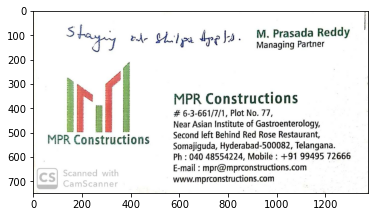

In [6]:
image = cv2.imread('./data/156.jpeg')
plt.imshow(image[:,:,::-1])

In [7]:
image = cv2.imread('./data/156.jpeg')
#plt.imshow(image[:,:,::-1])

pydata = pytesseract.image_to_data(image)
#print(pydata)
data = list(map(lambda a:a.split("\t") , pydata.split('\n')))
#data
data_1 = pd.DataFrame(data[1:] , columns=data[0])
data_1.dropna(inplace=True)
data_1['text'] = data_1['text'].apply(proper)
df = data_1.query('text != "" ')
content = " ".join([i for i in df['text']])
sol = model1(content)

In [8]:
displacy.render(sol , style='ent')

### Again tokenizing for further improving model performance 

In [9]:
soljson = sol.to_json()

In [10]:
soljson.keys()

dict_keys(['text', 'ents', 'tokens'])

In [11]:
sol_text = soljson['text']

In [12]:
soljson['ents']

[{'start': 0, 'end': 2, 'label': 'B-NAME'},
 {'start': 3, 'end': 4, 'label': 'I-NAME'},
 {'start': 5, 'end': 12, 'label': 'I-NAME'},
 {'start': 13, 'end': 18, 'label': 'I-NAME'},
 {'start': 58, 'end': 61, 'label': 'B-ORG'},
 {'start': 62, 'end': 75, 'label': 'I-ORG'},
 {'start': 76, 'end': 79, 'label': 'B-ORG'},
 {'start': 80, 'end': 93, 'label': 'I-ORG'},
 {'start': 233, 'end': 236, 'label': 'B-PHONE'},
 {'start': 237, 'end': 245, 'label': 'I-PHONE'},
 {'start': 253, 'end': 255, 'label': 'B-PHONE'},
 {'start': 256, 'end': 261, 'label': 'I-PHONE'},
 {'start': 262, 'end': 267, 'label': 'I-PHONE'},
 {'start': 274, 'end': 296, 'label': 'B-ORG'}]

In [13]:
soljson['tokens']

[{'id': 0, 'start': 0, 'end': 2},
 {'id': 1, 'start': 3, 'end': 4},
 {'id': 2, 'start': 5, 'end': 12},
 {'id': 3, 'start': 13, 'end': 18},
 {'id': 4, 'start': 19, 'end': 21},
 {'id': 5, 'start': 22, 'end': 24},
 {'id': 6, 'start': 25, 'end': 27},
 {'id': 7, 'start': 28, 'end': 30},
 {'id': 8, 'start': 31, 'end': 34},
 {'id': 9, 'start': 35, 'end': 37},
 {'id': 10, 'start': 38, 'end': 46},
 {'id': 11, 'start': 47, 'end': 54},
 {'id': 12, 'start': 55, 'end': 57},
 {'id': 13, 'start': 58, 'end': 61},
 {'id': 14, 'start': 62, 'end': 75},
 {'id': 15, 'start': 76, 'end': 79},
 {'id': 16, 'start': 80, 'end': 93},
 {'id': 17, 'start': 94, 'end': 101},
 {'id': 18, 'start': 102, 'end': 106},
 {'id': 19, 'start': 107, 'end': 109},
 {'id': 20, 'start': 110, 'end': 112},
 {'id': 21, 'start': 113, 'end': 117},
 {'id': 22, 'start': 118, 'end': 123},
 {'id': 23, 'start': 124, 'end': 133},
 {'id': 24, 'start': 134, 'end': 136},
 {'id': 25, 'start': 137, 'end': 153},
 {'id': 26, 'start': 154, 'end': 160

In [14]:
df_tokens = pd.DataFrame(soljson['tokens'])

In [15]:
df_tokens['token'] = df_tokens[['start','end']].apply(
    lambda x:sol_text[x[0]:x[1]] , axis = 1)
df_tokens.head(10)

,id,start,end,token
0,0,0,2,iz
1,1,3,4,m
2,2,5,12,prasada
3,3,13,18,reddy
4,4,19,21,py
5,5,22,24,ad
6,6,25,27,hl
7,7,28,30,pa
8,8,31,34,fre
9,9,35,37,js


In [16]:
sol_text[10:19]

'da reddy '

In [17]:
k = pd.DataFrame(soljson['ents'])[['start','label']]
df_tokens = pd.merge(df_tokens,k,how='left',on='start')

In [18]:
df_tokens.head(10)

,id,start,end,token,label
0,0,0,2,iz,B-NAME
1,1,3,4,m,I-NAME
2,2,5,12,prasada,I-NAME
3,3,13,18,reddy,I-NAME
4,4,19,21,py,NaN
5,5,22,24,ad,NaN
6,6,25,27,hl,NaN
7,7,28,30,pa,NaN
8,8,31,34,fre,NaN
9,9,35,37,js,NaN


In [19]:
df_tokens.fillna('O',inplace=True)
df_tokens.head(10)

,id,start,end,token,label
0,0,0,2,iz,B-NAME
1,1,3,4,m,I-NAME
2,2,5,12,prasada,I-NAME
3,3,13,18,reddy,I-NAME
4,4,19,21,py,O
5,5,22,24,ad,O
6,6,25,27,hl,O
7,7,28,30,pa,O
8,8,31,34,fre,O
9,9,35,37,js,O


In [20]:
df.head(10)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
7,5,1,1,1,1,4,795,72,18,52,34.684929,iz
8,5,1,1,1,1,5,920,77,48,34,89.750359,m
9,5,1,1,1,1,6,988,70,162,40,92.162186,prasada
10,5,1,1,1,1,7,1170,66,131,46,96.364296,reddy
12,5,1,1,1,2,1,183,52,163,125,31.925232,py
13,5,1,1,1,2,2,402,91,69,40,42.108059,ad
14,5,1,1,1,2,3,504,85,95,48,0.000000,hl
15,5,1,1,1,2,4,613,108,47,42,0.000000,pa
16,5,1,1,1,2,5,681,74,87,96,46.596813,fre
17,5,1,1,1,2,6,783,79,43,52,24.957458,js


In [21]:
df['end'] = df['text'].apply(lambda x: len(x)+1).cumsum() - 1 
df['start'] = df[['text','end']].apply(lambda x: x[1] - len(x[0]),axis=1)

In [22]:
df_c = pd.merge(df,df_tokens[['start','token','label']],how='inner',on='start')

In [23]:
df_c.head(10)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,end,start,token,label
0,5,1,1,1,1,4,795,72,18,52,34.684929,iz,2,0,iz,B-NAME
1,5,1,1,1,1,5,920,77,48,34,89.750359,m,4,3,m,I-NAME
2,5,1,1,1,1,6,988,70,162,40,92.162186,prasada,12,5,prasada,I-NAME
3,5,1,1,1,1,7,1170,66,131,46,96.364296,reddy,18,13,reddy,I-NAME
4,5,1,1,1,2,1,183,52,163,125,31.925232,py,21,19,py,O
5,5,1,1,1,2,2,402,91,69,40,42.108059,ad,24,22,ad,O
6,5,1,1,1,2,3,504,85,95,48,0.000000,hl,27,25,hl,O
7,5,1,1,1,2,4,613,108,47,42,0.000000,pa,30,28,pa,O
8,5,1,1,1,2,5,681,74,87,96,46.596813,fre,34,31,fre,O
9,5,1,1,1,2,6,783,79,43,52,24.957458,js,37,35,js,O


### Bounding boxes and entity on the top

In [24]:
d = df_c.query("label != 'O' ")
img = image.copy()

for x,y,w,h,label in d[['left','top','width','height','label']].values:
    x = int(x)
    y = int(y)
    w = int(w)
    h = int(h)
    
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    cv2.putText(img,str(label),(x,y),cv2.FONT_HERSHEY_PLAIN,1,(255,0,255),2)
    
#plt.imshow(img[:,:,::-1])
    
cv2.imshow('Predictions',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
d

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,end,start,token,label
0,5,1,1,1,1,4,795,72,18,52,34.684929,iz,2,0,iz,B-NAME
1,5,1,1,1,1,5,920,77,48,34,89.750359,m,4,3,m,I-NAME
2,5,1,1,1,1,6,988,70,162,40,92.162186,prasada,12,5,prasada,I-NAME
3,5,1,1,1,1,7,1170,66,131,46,96.364296,reddy,18,13,reddy,I-NAME
13,5,1,3,1,1,1,62,509,92,39,96.463989,mpr,61,58,mpr,B-ORG
14,5,1,3,1,1,2,169,507,309,41,96.582153,constructions,75,62,constructions,I-ORG
15,5,1,4,1,1,1,581,339,111,45,96.662338,mpr,79,76,mpr,B-ORG
16,5,1,4,1,1,2,711,332,376,51,96.175774,constructions,93,80,constructions,I-ORG
36,5,1,5,4,1,3,643,585,55,28,96.371742,040,236,233,040,B-PHONE
37,5,1,5,4,1,4,709,584,161,31,95.768425,48554224,245,237,48554224,I-PHONE


In [26]:
d['label'] = d['label'].apply(lambda x: x[2:])
d.head()

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,end,start,token,label
0,5,1,1,1,1,4,795,72,18,52,34.684929,iz,2,0,iz,NAME
1,5,1,1,1,1,5,920,77,48,34,89.750359,m,4,3,m,NAME
2,5,1,1,1,1,6,988,70,162,40,92.162186,prasada,12,5,prasada,NAME
3,5,1,1,1,1,7,1170,66,131,46,96.364296,reddy,18,13,reddy,NAME
13,5,1,3,1,1,1,62,509,92,39,96.463989,mpr,61,58,mpr,ORG


In [27]:

class kamal():
    def __init__(self):
        self.id = 0
        self.text = ''
        
    def e(self,text):
        if self.text == text:
            return self.id
        else:
            self.id +=1
            self.text = text
            return self.id
        
ob = kamal()

In [28]:
d['group'] = d['label'].apply(ob.e)

In [29]:
d[['left','top','width','height']] = d[['left','top','width','height']].astype(int)
d['right'] = d['left'] + d['width']
d['bottom'] = d['top'] + d['height']

In [30]:
qq = ['left','top','right','bottom','label','token','group']
x = d[qq].groupby(by='group')

In [31]:
img_tagging = x.agg({
    
    'left':min,
    'right':max,
    'top':min,
    'bottom':max,
    'label':np.unique,
    'token':lambda k: " ".join(k)
    
})

In [32]:
img_tagging

,left,right,top,bottom,label,token
group,,,,,,
1,795,1301,66,124,NAME,iz m prasada reddy
2,62,1087,332,548,ORG,mpr constructions mpr constructions
3,643,1305,582,615,PHONE,040 48554224 91 99495 72666
4,698,1123,627,665,ORG,mprmprconstructionscom


In [33]:
image = cv2.imread("./data/156.jpeg")

In [34]:
img_r = image.copy()
for l,r,t,b,label,token in img_tagging.values:
    cv2.rectangle(img_r,(l,t),(r,b),(0,255,0),2)
    
    cv2.putText(img_r,label,(l,t),cv2.FONT_HERSHEY_PLAIN,1,(255,0,255),2)
    
    
cv2.imshow('img',img_r)
cv2.waitKey(0)
cv2.destroyAllWindows()

### parsing 

In [35]:
import re

In [36]:
a = 'kamal123'
sol = re.sub('\d','',a)
sol

'kamal'

In [37]:
def clean(text,label):
    if label == 'PHONE':
        text = text.lower()
        text = re.sub(r'\D','',text)
    elif label == 'EMAIL':
        text = text.lower()
        a_s_c = '@_.\-'
        text = re.sub(r'[^A-Za-z0-9{} ]'.format(a_s_c),'',text)
    elif label == 'WEB':
        text = text.lower()
        a_s_c = ':/.%#\-'
        text = re.sub(r'[^A-Za-z0-9{} ]'.format(a_s_c),'',text)
    elif label in ("NAME","DES"):
        text = text.lower()
       # a_s_c = '@_.-'
        text = re.sub(r'[^a-z]','',text)
        text = text.title()
    elif label == "ORG":
        text = text.lower()
       # a_s_c = '@_.-'
        text = re.sub(r'[^a-z0-9]','',text)
        text = text.title()
    return text
    
        

In [38]:
clean("korla##$kuntasaikamal@&*gmail.,com","EMAIL")

'korlakuntasaikamal@gmail.com'

### Entities 

In [39]:
d.head()

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,end,start,token,label,group,right,bottom
0,5,1,1,1,1,4,795,72,18,52,34.684929,iz,2,0,iz,NAME,1,813,124
1,5,1,1,1,1,5,920,77,48,34,89.750359,m,4,3,m,NAME,1,968,111
2,5,1,1,1,1,6,988,70,162,40,92.162186,prasada,12,5,prasada,NAME,1,1150,110
3,5,1,1,1,1,7,1170,66,131,46,96.364296,reddy,18,13,reddy,NAME,1,1301,112
13,5,1,3,1,1,1,62,509,92,39,96.463989,mpr,61,58,mpr,ORG,2,154,548


In [40]:

info_array = df_c.query('label != "O"')[['token','label']].values

In [41]:
info_array

array([['iz', 'B-NAME'],
       ['m', 'I-NAME'],
       ['prasada', 'I-NAME'],
       ['reddy', 'I-NAME'],
       ['mpr', 'B-ORG'],
       ['constructions', 'I-ORG'],
       ['mpr', 'B-ORG'],
       ['constructions', 'I-ORG'],
       ['040', 'B-PHONE'],
       ['48554224', 'I-PHONE'],
       ['91', 'B-PHONE'],
       ['99495', 'I-PHONE'],
       ['72666', 'I-PHONE'],
       ['mprmprconstructionscom', 'B-ORG']], dtype=object)

In [42]:
entities = dict(NAME=[],ORG=[],DES=[],PHONE=[],EMAIL=[],WEB=[])
previous = ''
for tok, lab in info_array:
    bio_tag = lab[:1]
    label_tag = lab[2:]
    
    text = clean(tok,label_tag)
    
    
    
    if previous != label_tag:
        entities[label_tag].append(text)
        
    else:
        if bio_tag == 'B':
            entities[label_tag].append(text)
            
        else:
            if label_tag in ('NAME','ORG','DES'):
                entities[label_tag][-1] = entities[label_tag][-1]+" "+text
                
            else:
                entities[label_tag][-1] = entities[label_tag][-1]+text
            
    previous = label_tag

In [44]:
entities

{'NAME': ['Iz M Prasada Reddy'],
 'ORG': ['Mpr Constructions', 'Mpr Constructions', 'Mprmprconstructionscom'],
 'DES': [],
 'PHONE': ['04048554224', '919949572666'],
 'EMAIL': [],
 'WEB': []}